In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('exchange-rate-twi.csv')

In [8]:
train = df[:212]

In [9]:
test = df[213:]

In [11]:
train.shape, test.shape

((212, 2), (91, 2))

In [13]:
train["Exchange Rate TWI"].mean()

88.3254716981132

In [14]:
train.tail()

,Month,Exchange Rate TWI
207,208,55.2
208,209,56.2
209,210,51.7
210,211,52.3
211,212,52.0


In [15]:
 test['average_forecast'] = train["Exchange Rate TWI"].mean()

In [17]:
test['naive_forecast'] =  52

In [18]:
test.head()

,Month,Exchange Rate TWI,average_forecast,naive_forecast
213,214,53.1,88.325472,52
214,215,53.8,88.325472,52
215,216,55.2,88.325472,52
216,217,58.9,88.325472,52
217,218,59.8,88.325472,52


In [23]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(test["Exchange Rate TWI"], test["average_forecast"])

1048.3665621393554

In [30]:
np.sqrt(mean_squared_error(test["Exchange Rate TWI"], test["average_forecast"]))

32.378489188647386

In [38]:
np.sqrt(mean_squared_error(test["Exchange Rate TWI"], test["naive_forecast"]))

6.016314815237312

In [36]:
np.mean(abs(test["Exchange Rate TWI"] - test["average_forecast"])/test["Exchange Rate TWI"]*100)

58.0059334405746

In [37]:
np.mean(abs(test["Exchange Rate TWI"] - test["naive_forecast"])/test["Exchange Rate TWI"]*100)

8.487960759343235

,Month,Exchange Rate TWI,MovingAverage
0,1,100.0,0.000000
1,2,99.6,0.000000
2,3,99.4,0.000000
3,4,99.1,0.000000
4,5,99.2,0.000000
...,...,...,...
299,300,49.6,53.441667
300,301,48.5,52.933333
301,302,48.4,52.550000
302,303,51.0,52.308333


# moving average window

In [92]:
test_len = 212
ma_window = 12
df["MovingAverage"] = df["Exchange Rate TWI"].rolling(ma_window).mean()
df["MovingAverage"][test_len:] = df["MovingAverage"][test_len-1]

In [93]:
import matplotlib.pyplot as plt

In [94]:
train

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2
...,...,...
207,208,55.2
208,209,56.2
209,210,51.7
210,211,52.3


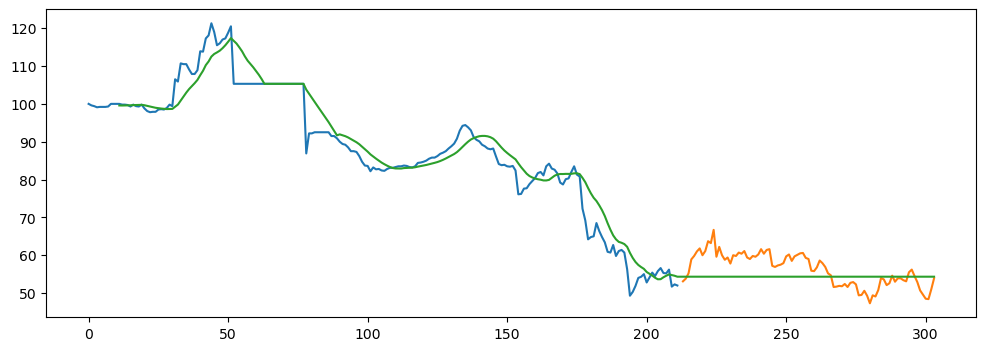

In [95]:
plt.figure(figsize=(12,4))
plt.plot(train["Exchange Rate TWI"])
plt.plot(test["Exchange Rate TWI"])
plt.plot(df["MovingAverage"])
plt.show()

In [96]:
np.sqrt(mean_squared_error(df[test_len:]["Exchange Rate TWI"], df[test_len:]["MovingAverage"]))

4.661162968336478

In [85]:
#12 -> 4.6, 6.95
#6 -> 4.9, 7.12
#3 -> 5.9, 8.4

In [97]:
np.mean(abs(df[test_len:]["Exchange Rate TWI"] - df[test_len:]["MovingAverage"])/df[test_len:]["Exchange Rate TWI"]*100)

6.955649673633229